==============================================================================================
## Practicum 5: Image search using textures
==============================================================================================



The exercises of this notebook will show how we can perform image similarity search using:

- Gaussian filters
- Descriptors based on texture and color

#### Problem we want to solve
- Given a query image **$x$** and a set of images **$X$** we would like to retreive the most similar to **$x$** images from  **$X$**.


## Delivery

All code sould be commented in English. Answers of the questions should be given in English too.

Compressed file **P5_Student1_Student2.zip** that includes:
- The notebook P5_Student1_Student2.ipynb completed with the solutions to the exercises and their corresponding comments.
- The images used that are not provided in P5.zip.

**Deadline (Campus Virtual): Desember 12th, 11:00 p.m.** 


 The function should return a feature vector obtained by averaging each filter response on the image.  

**Hint**: Note that since at this moment we are focusing on the texture, we will not use the color of the images.

## Looking at the images

In [49]:
%matplotlib inline

import time
import scipy
import numpy as np
import skimage
from skimage import filters
from skimage import io
import os

import matplotlib.pyplot as plt

In [50]:
path = "./images/texturesimages/buildings/"
building_images = [skimage.io.imread(path + f) for f in os.listdir(path)]

path = "./images/texturesimages/forest/"
forest_images = [skimage.io.imread(path + f) for f in os.listdir(path)]

path = "./images/texturesimages/sunset/"
sunset_images = [skimage.io.imread(path + f) for f in os.listdir(path)]

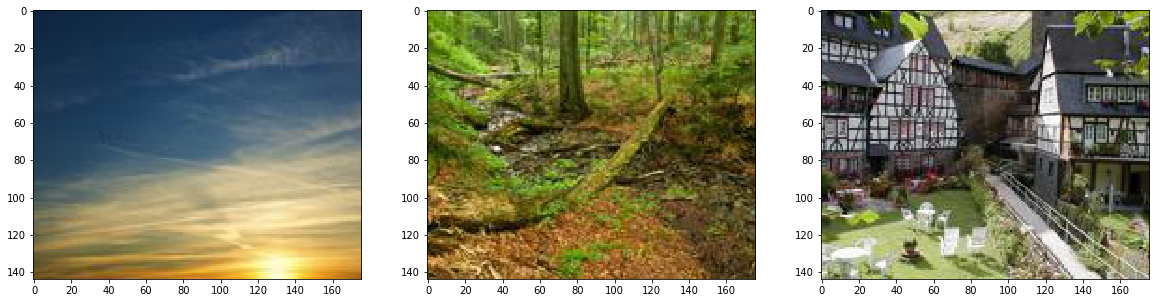

In [51]:
fig, ax= plt.subplots(ncols=3, nrows=1, figsize=(20,30))

ax[0].imshow(sunset_images[0])
ax[1].imshow(forest_images[0])
ax[2].imshow(building_images[0])
plt.show()

In [52]:
len(sunset_images), len(forest_images), len(sunset_images)

(30, 30, 30)

# Filter banks

We can apply a collection of multiple filters that we call a filter bank. Note that if we apply $D$ filters our feature vectors will be $D$ dimensional.

The following image shows a filter bank. In the filter bank we typically want filters to capture a combination of scales, orientations of different types of patterns. This particular filter bank is The Leung-Malik (LM) Filter Bank.

<img src="./images_notebook/filter_bank.png">


## Leung-Malik (LM) Filter Bank

In [53]:
import LM_filters

In [54]:
filter_bank = LM_filters.makeLMfilters()
filter_bank.shape

(49, 49, 48)

### Plotting all filters

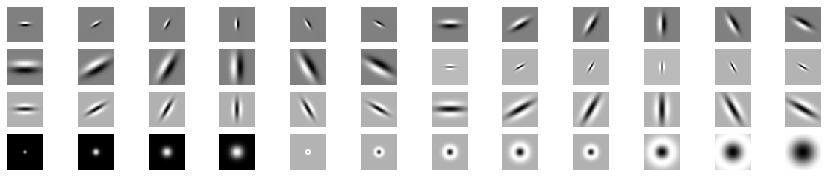

In [55]:
n_filters = filter_bank.shape[-1]

fig, ax = plt.subplots(ncols=12, nrows=4, figsize=(15,3))

k = 0

for i in range(4):
    for j in range(12):
        ax[i,j].imshow(filter_bank[:,:,k], cmap = 'gray')
        ax[i,j].axis("off")
        k = k + 1

## Exercise 5.1 Plot the convolved image by some of the filters


Make a function `visualize_features(im,  filter_bank, n_filters=5)` that recieves the `filter_bank`, an image `im` and an integer `n_filters`. 

The function  must make a plot of two rows containing in the first row, in position $k$, the image convolved by filter $k$. In the second row, in position $k$, the image of the k'th filter. The result for `n_filter=5` should look like 


<img src="./images/filters.png">


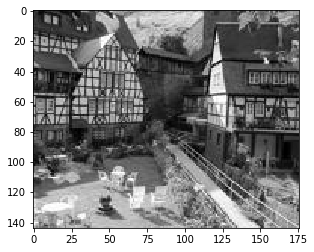

In [56]:
im = building_images[0]
im = skimage.color.rgb2gray(im)
plt.imshow(im, cmap="gray")
plt.show()

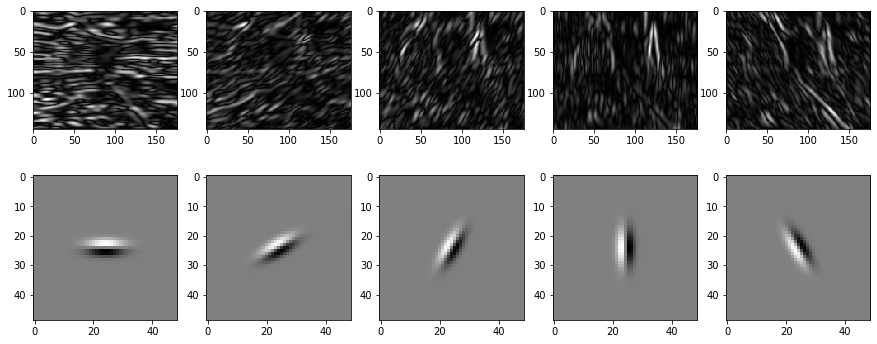

In [57]:
from scipy import ndimage

def visualize_features(im,  filter_bank, n_filters = 5):
    fig, ax = plt.subplots(ncols=n_filters, nrows=2, figsize=(15,6))
    # complete this function
    for i in range(n_filters): # Convolve for n_filters (k = 5)
        # Convolve the image with the k'th filter of our filter bank
        convolved_img = abs(ndimage.convolve(im, filter_bank[:,:,i]))
        # Show convolved image and k'th filter
        ax[0][i].imshow(convolved_img, cmap='gray')
        ax[1][i].imshow(filter_bank[:,:,i], cmap='gray')    
    plt.show()
    
visualize_features(im, filter_bank)


## Exercise 5.2 Constructing a feature vector for a given image


Given $D$ filters from the filter bank and a single image `image`, make a function `features_from_filter_bank(image, filter_bank, n_filters)` that returns a feature vector of shape `n_filters`. The returned vector must contain at position $k$ the mean of the absolute value of the convolved image by filter $k$.

$$
\text{feat}(x) = \left( \text{mean}( |r_1|), \dots,\text{mean}(|r_D|) \right)
$$



In [58]:
def features_from_filter_bank(image, filter_bank, n_filters):
    ## Complete this function
    convolved_img = np.zeros(image.shape)  # Initialize numpy array as shape of image 
    features_for_im = np.zeros(n_filters)
    
    for i in range(n_filters):  # Save each mean value of convolved images by k'th filter
        convolved_img = abs(ndimage.convolve(image, filter_bank[:,:,i]))
        features_for_im[i] = np.mean(convolved_img)
    
    return features_for_im

im = skimage.color.rgb2gray(building_images[0])
features_for_im = features_from_filter_bank(im, filter_bank, n_filters)

print(features_for_im)

[2.00859681e-02 1.61256625e-02 1.54533802e-02 1.70019903e-02
 1.68166543e-02 1.84022135e-02 1.08481144e-02 9.56773674e-03
 8.55567935e-03 8.94950198e-03 9.59764109e-03 1.00809777e-02
 7.91048635e-03 7.29476207e-03 5.67613324e-03 5.80606581e-03
 6.70502061e-03 7.29787858e-03 1.20522081e-02 7.71941102e-03
 7.56950599e-03 1.02202574e-02 8.38786624e-03 9.56258556e-03
 2.86944525e-03 2.17427810e-03 2.15946117e-03 2.62800351e-03
 2.49481035e-03 2.39542501e-03 1.32265184e-03 1.11561246e-03
 1.00538962e-03 1.22886770e-03 1.24008420e-03 1.07898125e-03
 1.46611356e+00 2.93222712e+00 4.39834062e+00 5.86428456e+00
 7.33056780e-01 3.66528390e-01 2.44352136e-01 1.83154055e-01
 2.44352136e-01 1.12581668e-01 3.57600164e-02 3.15606406e-03]


## Exercise 5.3 Constructing the matrix of the feature vectors for all images

Implement a function `get_class_Features(all_images, filter_bank)` that applies `features_from_filter_bank` to get a feature vector for each of the images in the union of the three datasets (forest, buildings, sunset). It must return a matrix containing at row $k$ feature vector for the input image $k$.


Wall time: 7min 49s

In [59]:
all_images = building_images + forest_images + sunset_images

In [60]:
%%time

def get_class_features(all_images,  filter_bank):
    n_images = len(all_images)
    n_filters = filter_bank.shape[-1]
    all_feature_vectors = np.zeros((n_images, filter_bank.shape[-1]))
    # Complete
    for i in range(n_images):  # For each image in all_images
        image = skimage.color.rgb2gray(all_images[i])
        # Save the features of each image to all_feature_vectors
        all_feature_vectors[i] = features_from_filter_bank(image, filter_bank, n_filters)
    
    return all_feature_vectors

all_feature_vectors = get_class_features(all_images, filter_bank)

CPU times: user 8min 54s, sys: 12 s, total: 9min 6s
Wall time: 9min 32s


## Exercise 5.4 Visualizing the features of an image

Define a function `visualize_features` that given a feature index and an array containing all feature vectors, plots its values for the three datasets using different colors for each dataset (in total plots should contain 3 colors).


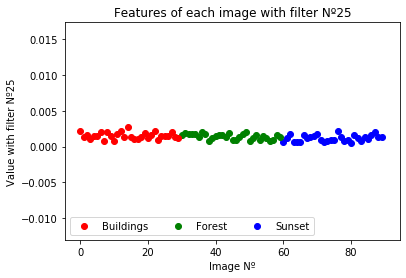

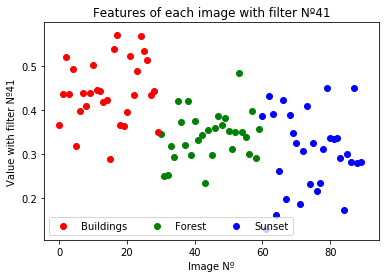

In [61]:
def visualize_features(k, all_feature_vectors):
    # complete
    length = int(all_feature_vectors.shape[0]/3)
    # Split our data into 3 sets of 30 images
    
    for i in range(length): # Get the features of the k'th column for every image
        
        # Buildings with red color - first 30 images
        r = plt.scatter(i, all_feature_vectors[i, k], c = 'r')
        # Forest with green color - second 30 images
        g = plt.scatter(i + length, all_feature_vectors[i + length, k], c = 'g')
        # Sunset with blue color - third 30 images
        b = plt.scatter(i + 2*length, all_feature_vectors[i + 2*length, k], c = 'b')
    
    # Legend, title and axis
    plt.legend((r,g,b),('Buildings','Forest','Sunset'), scatterpoints = 1, loc = 'lower left', ncol = 3)
    plt.title("Features of each image with filter Nº" + str(k))
    plt.xlabel('Image Nº')
    plt.ylabel('Value with filter Nº' + str(k))
    plt.show()

visualize_features(25, all_feature_vectors)    
visualize_features(41, all_feature_vectors)    





#### Similarity search

Let us assume $f(x) \in \mathbb{R}^D$ represents a set of features for $x$. Given a query image $x$ and another image $x^m$ from the database, we can compute the distance between images as
$$
\text{distance}\left( f(x) , \, f(x^m) \right) = \| \text{feat}(x)  - \text{feat}(x^m)  \|_2 =  \sqrt{ \sum_{d=1}^\text{D} \left( f(x)_d - f(x^m)_d  \right)^2 }
$$

then we can find the closest image $x^{m^*}$ from the database to $x$ as $m^* =  \text{argmin}_{m} \{ \| \text{feat}(x)  - \text{feat}(x^m)  \|_2 \}$


## Exercise 5.5 Retrieving the most similar images



Implement a function `retrieve_k_images_from_X(query, X, k)` where `query` is an image,  `X` ins the array containing the features from all the images and  `k` is an integer. The function should retrieve the `k` most similar images (according to the l2 norm) and the distances from the closest images to the query image. You can include the query image since it is in `X`.

- Make a plot with the first column beeing the query image and the other k columns the closest images in the feature space.

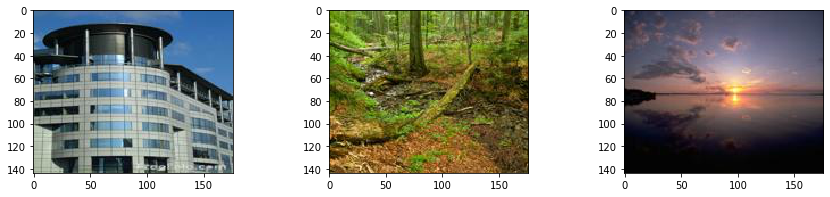

In [62]:
X = np.array(all_feature_vectors)
ind_1 = 6
ind_2 = 30
ind_3 = 65

query_1 = X[6, :]
query_2 = X[30,:]
query_3 = X[65,:]


# Display the query images
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(15,3))
ax[0].imshow(all_images[6]) 
ax[1].imshow(all_images[30])
ax[2].imshow(all_images[65])
plt.show()

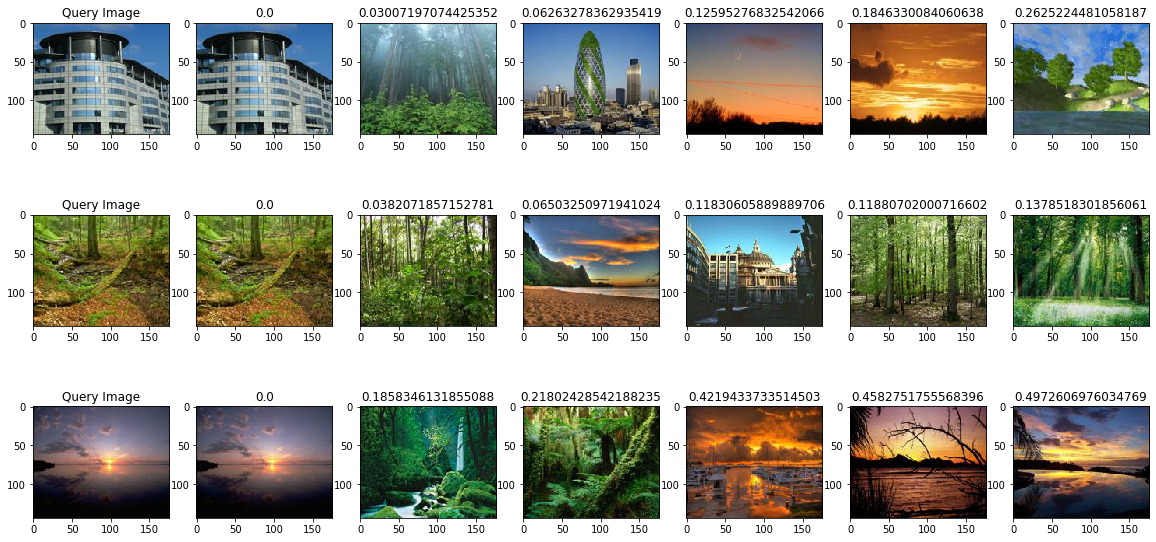

In [63]:
import operator

def retrieve_k_images_from_X(query, X, k):
    #Complete

    distances = []
    closest_to_query = []
    closest_images = []
    
    for im in X:
        d = np.linalg.norm(query - im)  # Perform the distance from the query to current image
        distances.append(d)

    for i in range(k + 1):  # Add minumum image & distance 
        closest_images.append(distances.index(min(distances)))
        closest_to_query.append(min(distances))
        distances[np.argmin(distances)] = float('inf')
    
    return closest_images, closest_to_query

k = 5 # Get the data for our query images
imgs_1, dist_1 = retrieve_k_images_from_X(query_1, X, k)
imgs_2, dist_2 = retrieve_k_images_from_X(query_2, X, k)
imgs_3, dist_3 = retrieve_k_images_from_X(query_3, X, k)

fig, ax = plt.subplots(ncols=(k + 2), nrows=3, figsize=(20,10))

for i in range(k + 1):  # Plot the result of the query image & similar images in dataset
    ax[0,i+1].imshow(all_images[imgs_1[i]])
    ax[0][i+1].set_title(dist_1[i])
    ax[1,i+1].imshow(all_images[imgs_2[i]])
    ax[1][i+1].set_title(dist_2[i])
    ax[2,i+1].imshow(all_images[imgs_3[i]])
    ax[2][i+1].set_title(dist_3[i])
    ax[0, 0].imshow(all_images[ind_1])
    ax[0, 0].set_title('Query Image')
    ax[1, 0].imshow(all_images[ind_2])
    ax[1, 0].set_title('Query Image')
    ax[2, 0].imshow(all_images[ind_3])
    ax[2, 0].set_title('Query Image')

## Exercise 5.6 Compute the accuracy of the algorithm: given a query image. 

Make a function 

```
accuracy(X, class_labels, k=5, query=x, class_query=y)
```

That takes as input a the dataset `X`, the `class_labels` for the images, the number of images to retrieve `k`, a query image `x` and the class of the query image `y`. Returns as output the number of retrieved images that belong to class `y` divided by the total of images retrieved `k` (this is the accuracy).

**Hint**: be careful to exclude the query image from the retrieved images.

- Compute the accuracy with k=4 with the previous images. Does the accuracy match the images retrieved from the previous exercise?


In [64]:
class_labels = np.concatenate((np.zeros(30), np.ones(30),  2 * np.ones(30))).reshape(90,1)

In [69]:
def accuracy(X, class_labels, k, query, class_query):
    # Complete
    similar = 0.0
    total = 0.0
    
    imgs, dist = retrieve_k_images_from_X(query, X, k)  # Retrieve the K images from dataset X 
    imgs.pop(0)  # Exclude query image from retrieved images
    
    for img in imgs:
        if(class_labels[img] == class_query):
            similar += 1  # Add 1 to similarity

    return similar / k # Perform the accuracy

k = 4
print('Building accuracy = ' + str(accuracy(X, class_labels, k, query_1, 0) * 100) + '%')
print('Forest accuracy = ' + str(accuracy(X, class_labels, k, query_2, 1) * 100) + '%')
print('Sunset accuracy = ' + str(accuracy(X, class_labels, k, query_3, 2) * 100) + '%')

Building accuracy = 25.0%
Forest accuracy = 50.0%
Sunset accuracy = 50.0%


## Answer

The accuracy of Building is 25%, Forest is 50% and Sunset is 50%.

## Exercise 5.7 Image retrieval based on texture and color. 

Make a function ` lm_features_rgb(image, filter_bank)`  that returns the features from the filter bank concatenated per color. If the previous feature vectors had 49 components now they will have 49*3 components. 


In [70]:
def lm_features_rgb(image, filter_bank):

    n_filters = len(filter_bank)
    im_conv_r = np.array(image[:,:,0])
    im_conv_g = np.array(image[:,:,1])
    im_conv_b = np.array(image[:,:,2])
    features_for_im = np.zeros(3 * n_filters)
    # Complete
    
    # Calculate the features for the image for every channel and cocatenate it into a single array
    R_channel = features_from_filter_bank(im_conv_r, filter_bank, n_filters-1)
    G_channel = features_from_filter_bank(im_conv_g, filter_bank, n_filters-1)
    B_channel = features_from_filter_bank(im_conv_b, filter_bank, n_filters-1)
    features_for_im = np.concatenate((R_channel, G_channel, B_channel))
        
    return features_for_im

In [71]:
%%time 
lm_rgb_features = lm_features_rgb(all_images[0], filter_bank)

CPU times: user 19.2 s, sys: 646 ms, total: 19.8 s
Wall time: 21.1 s



## Exercise 5.8 Apply the function to all the images in the dataset

Using ` lm_features_rgb(image, filter_bank)` build the features of all the datapoints in and save them in `X_lm_rgb`.
You can parallelize the feature building process using `joblib.Parallel`. This will make the computation much faster if you have a processor with more than two threads.

In [72]:
%%time
from joblib import Parallel, delayed
    
def get_all_datapoints(all_images, filter_bank):
    n_images = len(all_images)
    n_filters = filter_bank.shape[-1]
    
    # Compute the lm_feature_rgb for each image and save it into a row of our datapoints
    datapoints =(Parallel(n_jobs=6)(delayed(lm_features_rgb)(img, filter_bank) for img in all_images))
    datapoints= np.array(datapoints)
    return datapoints

X_lm_rgb = get_all_datapoints(all_images, filter_bank)

/Users/qijunjin/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


CPU times: user 532 ms, sys: 231 ms, total: 763 ms
Wall time: 14min 7s


## 5.9 Compute the accuracy of the method using lm rgb features

Use the function implemented in 5.6 to compute the accuracy of the retrieved images using the features that contain color information. Make a plot of the 4 closest images to the query images in the `lm_rgb` space.

- Is the accuracy higher?

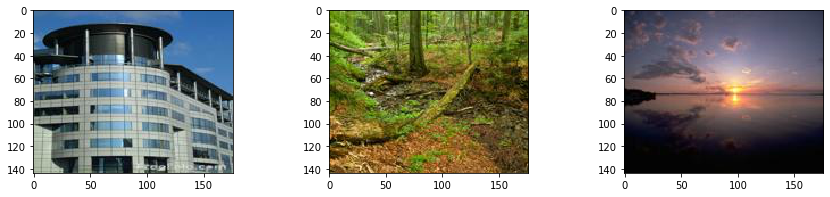

Building accuracy = 80.0%
Forest accuracy = 100.0%
Sunset accuracy = 80.0%


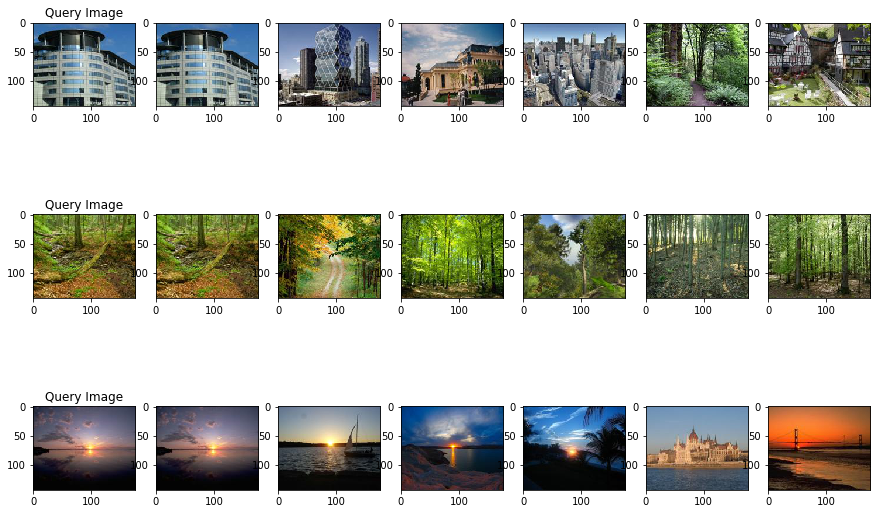

In [73]:
# compute (X_lm_rgb) and cast it as array
ind_1 = 6
ind_2 = 30
ind_3 = 65

query_1 = X_lm_rgb[ind_1, :]
query_2 = X_lm_rgb[ind_2, :]
query_3 = X_lm_rgb[ind_3, :]

# Display the query images
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(15,3))
ax[0].imshow(all_images[ind_1]) 
ax[1].imshow(all_images[ind_2])
ax[2].imshow(all_images[ind_3])

plt.show()

k = 5 # Define the number of images to retrieve
imgs_1, dist_1 = retrieve_k_images_from_X(query_1, X_lm_rgb, k)
imgs_2, dist_2 = retrieve_k_images_from_X(query_2, X_lm_rgb, k)
imgs_3, dist_3 = retrieve_k_images_from_X(query_3, X_lm_rgb, k)

fig, ax = plt.subplots(ncols=(k + 2), nrows=3, figsize=(15,10))
for i in range(k + 1):
    ax[0,i+1].imshow(all_images[imgs_1[i]])
    ax[1,i+1].imshow(all_images[imgs_2[i]])
    ax[2,i+1].imshow(all_images[imgs_3[i]])
    ax[0, 0].imshow(all_images[ind_1])
    ax[0, 0].set_title('Query Image')
    ax[1, 0].imshow(all_images[ind_2])
    ax[1, 0].set_title('Query Image')
    ax[2, 0].imshow(all_images[ind_3])
    ax[2, 0].set_title('Query Image')

print('Building accuracy = ' + str(accuracy(X_lm_rgb, class_labels, k, query_1, 0) * 100) + '%')
print('Forest accuracy = ' + str(accuracy(X_lm_rgb, class_labels, k, query_2, 1) * 100) + '%')
print('Sunset accuracy = ' + str(accuracy(X_lm_rgb, class_labels, k, query_3, 2) * 100) + '%')


## Answer

Actually, the accuracy of method using LM RGB features is higher, as the results are 80% for Building, 100% for Forest and 80% for Sunset.